<blockquote>
    <h1>Exercise 10.10</h1>
    <p>In this problem, you will generate simulated data, and then perform PCA and $K$-means clustering on the data.</p>
    <ol>
        <li>
            Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. 
            <br>
            <i>
                Hint: There are a number of functions in <code>R</code> that you can use to generate data. One example is the <code>rnorm()</code> function; <code>runif()</code> is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.
            </i>
        </li>
        <li>Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part 3. If not, then return to part 1 and modify the simulation so that there is greater separation between the three classes. Do not continue to part 3 until the three classes show at least some separation in the first two principal component score vectors.</li>
        <li>
            Perform $K$-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in $K$-means clustering compare to the true class labels?
            <br>
            <i>
                Hint: You can use the <code>table()</code> function in <code>R</code> to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: $K$-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.
            </i>
        </li>
        <li>Perform $K$-means clustering with $K = 2$. Describe your results.</li>
        <li>Now perform $K$-means clustering with $K = 4$, and describe your results.</li>
        <li>Now perform $K$-means clustering with $K = 3$ on the first two principal component score vectors, rather than on the raw data. That is, perform $K$-means clustering on the 60 $\times$ 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.</li>
        <li>Using the <code>scale()</code> function, perform $K$-means clustering with $K = 3$ on the data <i>after scaling each variable to have standard deviation one</i>. How do these results compare to those obtained in 2? Explain.</li>
    </ol>
</blockquote>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

<h3>Exercise 10.10.1</h3>
<blockquote>
    <i>
        Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. 
        <br>
        <i>
            Hint: There are a number of functions in <code>R</code> that you can use to generate data. One example is the <code>rnorm()</code> function; <code>runif()</code> is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.
        </i>
    </i>
</blockquote>

In [2]:
n = 60
n_per_class = 20
p = 50
classes = ['No', 'Maybe', 'Yes']

x, y = make_blobs(
    n_samples=n,  # If int, it is the total number of points equally divided among clusters.
    n_features=50,
    centers = 3,
    cluster_std=[3, 1.5, 2],
    shuffle=True,
    random_state=42
)

df_y = pd.DataFrame({'y': y})
df_y.loc[(df_y['y'] == 0, 'y')] = 'No'
df_y.loc[(df_y['y'] == 1, 'y')] = 'Maybe'
df_y.loc[(df_y['y'] == 2, 'y')] = 'Yes'
df_x = pd.DataFrame()
for i, (class_, column) in enumerate(zip(classes, x.T)):
    df_x[class_] = column

<h3>Exercise 10.10.2</h3>
<blockquote>
    <i>Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part 3. If not, then return to part 1 and modify the simulation so that there is greater separation between the three classes. Do not continue to part 3 until the three classes show at least some separation in the first two principal component score vectors.</i>
</blockquote>

In [3]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), 
    ('pca', PCA(n_components=2))
])
principal_components = pipeline.fit_transform(df_x)
pipeline['pca'].explained_variance_ratio_

array([0.6784852 , 0.28018655])

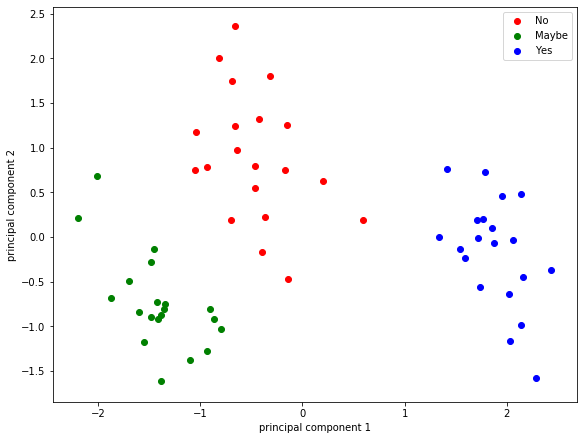

In [4]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for class_, color in zip(classes, colors):
    mask = df_y['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        c=color,
        label=class_
    )

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')
_ = ax.legend()

<h3>Exercise 10.10.3</h3>
<blockquote>
    <i>
        Perform $K$-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in $K$-means clustering compare to the true class labels?
        <br>
        <i>
            Hint: You can use the <code>table()</code> function in <code>R</code> to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: $K$-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.
        </i>
    </i>
</blockquote>

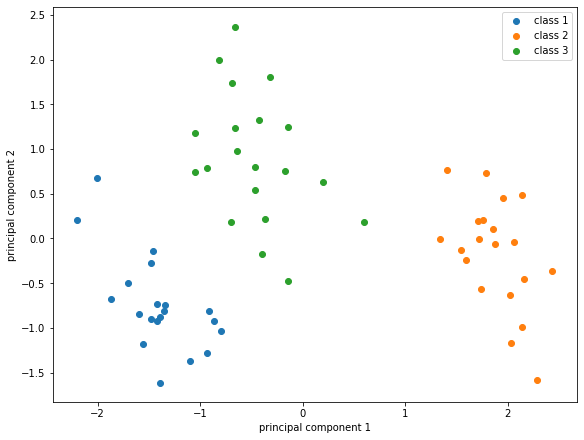

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=42)
y_pred = kmeans.fit_predict(df_x)
df_y_pred = pd.DataFrame({'y': y_pred})
classes = np.unique(y_pred)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for i, class_ in enumerate(classes):
    mask = df_y_pred['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        label=f'class {i + 1}'
    )

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')
_ = ax.legend()

<p>The $K$-means clustering with $K = 3$ assigns all the instances to the appropriate cluster.</p>

<h3>Exercise 10.10.4</h3>
<blockquote>
    <i>Perform $K$-means clustering with $K = 2$. Describe your results.</i>
</blockquote>

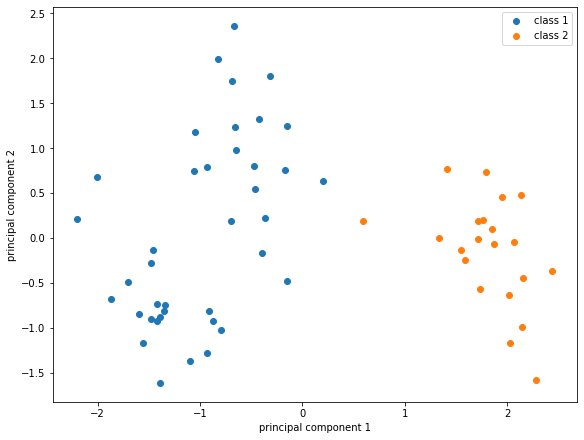

In [6]:
k = 2
kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=42)
y_pred = kmeans.fit_predict(df_x)
df_y_pred = pd.DataFrame({'y': y_pred})
classes = np.unique(y_pred)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for i, class_ in enumerate(classes):
    mask = df_y_pred['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        label=f'class {i + 1}'
    )

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')
_ = ax.legend()

<h3>Exercise 10.10.5</h3>
<blockquote>
    <i>Now perform $K$-means clustering with $K = 4$, and describe your results.</i>
</blockquote>

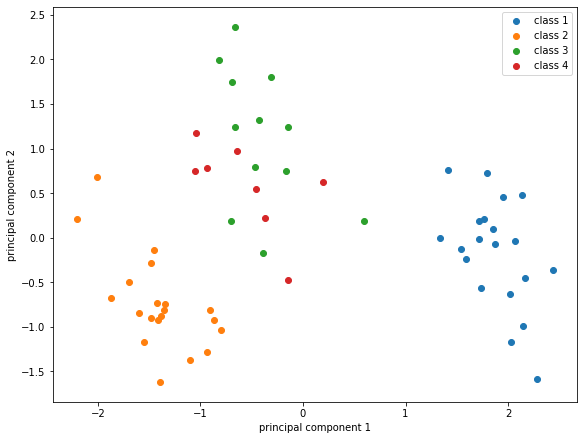

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=42)
y_pred = kmeans.fit_predict(df_x)
df_y_pred = pd.DataFrame({'y': y_pred})
classes = np.unique(y_pred)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for i, class_ in enumerate(classes):
    mask = df_y_pred['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        label=f'class {i + 1}'
    )

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')
_ = ax.legend()

<h3>Exercise 10.10.6</h3>
<blockquote>
    <i>Now perform $K$-means clustering with $K = 3$ on the first two principal component score vectors, rather than on the raw data. That is, perform $K$-means clustering on the 60 $\times$ 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.</i>
</blockquote>

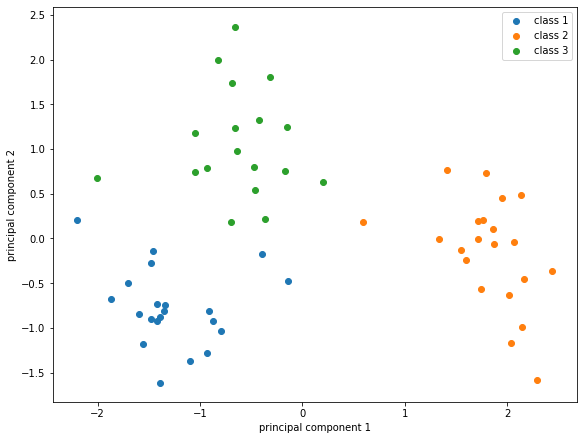

In [8]:
k = 3
kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=42)
y_pred = kmeans.fit_predict(principal_components)
df_y_pred = pd.DataFrame({'y': y_pred})
classes = np.unique(y_pred)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for i, class_ in enumerate(classes):
    mask = df_y_pred['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        label=f'class {i + 1}'
    )

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')
_ = ax.legend()

<h3>Exercise 10.10.7</h3>
<blockquote>
    <i>Using the <code>scale()</code> function, perform $K$-means clustering with $K = 3$ on the data <i>after scaling each variable to have standard deviation one</i>. How do these results compare to those obtained in 2? Explain.</i>
</blockquote>

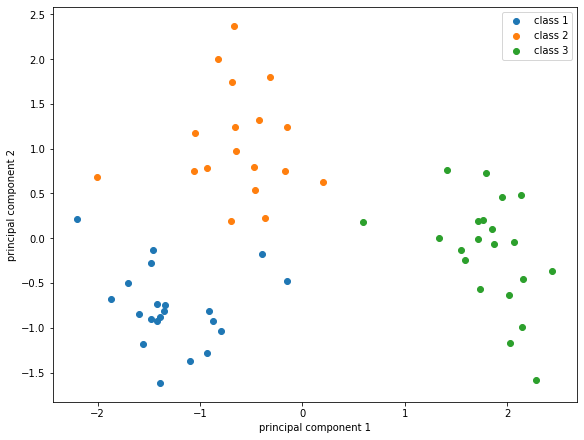

In [9]:
k = 3
pipeline = Pipeline([
    ('scaling', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=k, n_jobs=-1, random_state=42))
])
y_pred = pipeline.fit_predict(principal_components)
df_y_pred = pd.DataFrame({'y': y_pred})
classes = np.unique(y_pred)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
for i, class_ in enumerate(classes):
    mask = df_y_pred['y'] == class_
    _ = ax.scatter(
        principal_components[:, 0][mask],
        principal_components[:, 1][mask],
        label=f'class {i + 1}'
    )

_ = ax.set_xlabel('principal component 1')
_ = ax.set_ylabel('principal component 2')
_ = ax.legend()

<p>Now, the $K$-means clustering with $K = 3$ wrongly assigns some of the instances, and so these results are worse.</p>